In [491]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from sklearn.metrics import mean_absolute_error, mean_squared_error
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [492]:
#data = pd.read_csv('ok.csv')
#count_row = data.shape[0]  
#count_col = data.shape[1] 
#print(count_col)

data = pd.read_csv('order_data.csv', low_memory=False)
data.fillna(0, inplace=True)
blankIndex=[''] * len(data)
data.index=blankIndex

In [493]:
print(data)

  Distance  Weight Shipping method Carrier  Delivery time  \
        50       5          Ground     UPS              3   
       100      10             Air   FedEx              2   
       200      20          Ground    USPS              5   
       300      30         Express     DHL              1   
        50       5          Ground     UPS              3   
       100      10             Air   FedEx              2   
       200      20          Ground    USPS              5   
       300      30         Express     DHL              1   
        50       5          Ground     UPS              3   
       100      10             Air   FedEx              2   
       200      20          Ground    USPS              5   
       300      30         Express     DHL              1   
        50       5          Ground     UPS              3   
       100      10             Air   FedEx              2   
       200      20          Ground    USPS              5   
       300      30      

In [497]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['Distance', 'Weight', 'Shipping method', 'Carrier','Item type','pincode']], data['Delivery time'], test_size=0.2, random_state=42,shuffle=True)

In [495]:
X_train, X_test, y_train, y_test = train_test_split(data,data['end_to_end_order2dispatch_hours'], test_size=0.2, random_state=42,shuffle=True)

KeyError: 'end_to_end_order2dispatch_hours'

In [496]:
print(y_test)

    1
    2
    2
    3
    2
    2
    2
    1
    1
    2
    2
Name: Delivery time, dtype: int64


In [467]:

print(X_train_encoded)

  Distance  Weight  pincode  Shipping method_Air  Shipping method_Express  \
       100      10   386605                    1                        0   
       300      30   386596                    0                        1   
       100      10   386598                    1                        0   
        50       5   345006                    0                        0   
        50       5   386597                    0                        0   
        50       5   450032                    0                        0   
       300      30   386600                    0                        1   
       100      10   386590                    1                        0   
       100      10   386613                    1                        0   
        50       5   387002                    0                        0   
       200      20   386606                    0                        0   
       100      10   386586                    1                        0   

In [498]:
# Encode categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=['Shipping method', 'Carrier','Item type'])
X_test_encoded = pd.get_dummies(X_test, columns=['Shipping method', 'Carrier','Item type'])


In [488]:
# Encode categorical variables
#X_train_encoded = pd.get_dummies(X_train)
#X_test_encoded = pd.get_dummies(X_test)
print(X_train_encoded.columns)

Index(['Distance', 'Weight', 'pincode', 'Shipping method_Air',
       'Shipping method_Express', 'Shipping method_Ground', 'Carrier_DHL',
       'Carrier_FedEx', 'Carrier_UPS', 'Carrier_USPS',
       'Item type_ELECTRONIC_DELIVERY', 'Item type_PERISHABLE',
       'Item type_REGULAR'],
      dtype='object')


In [499]:
# Train a random forest regression model
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train_encoded.values, y_train)



RandomForestRegressor(max_depth=5)

In [413]:
#print(X_train_encoded.columns)
#print(X_test_encoded.columns)

In [500]:
# Make predictions on the testing set
y_pred = model.predict(X_test_encoded.values)

In [501]:
rf_prediction, rf_bias, rf_contributions = ti.predict(model, X_test_encoded.values)

In [ ]:
#print(y_pred)

In [502]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 1.0519363636363641


In [503]:
rf_ft_list = []
for i in range(len(X_test_encoded.values)):
    print("Bias (trainset mean)", rf_bias[i])
    for c, feature in sorted(zip(rf_contributions[i], 
                                 X_train.columns), 
                             key=lambda x: -abs(x[0])):
       rf_ft_list.append((feature, round(c, 2)))
    print("-"*50)

Bias (trainset mean) 2.982558139534884
--------------------------------------------------
Bias (trainset mean) 2.982558139534884
--------------------------------------------------
Bias (trainset mean) 2.982558139534884
--------------------------------------------------
Bias (trainset mean) 2.982558139534884
--------------------------------------------------
Bias (trainset mean) 2.982558139534884
--------------------------------------------------
Bias (trainset mean) 2.982558139534884
--------------------------------------------------
Bias (trainset mean) 2.982558139534884
--------------------------------------------------
Bias (trainset mean) 2.982558139534884
--------------------------------------------------
Bias (trainset mean) 2.982558139534884
--------------------------------------------------
Bias (trainset mean) 2.982558139534884
--------------------------------------------------
Bias (trainset mean) 2.982558139534884
--------------------------------------------------


In [345]:
#print(X_train.columns)

Index(['Distance', 'Weight', 'Shipping method', 'Carrier', 'Item type',
       'pincode'],
      dtype='object')


In [504]:
rf_labels, rf_values = zip(*rf_ft_list)

In [505]:
rf_ft_list

[('pincode', -0.81),
 ('Distance', -0.16),
 ('Weight', -0.14),
 ('Shipping method', -0.1),
 ('Item type', -0.05),
 ('Carrier', -0.04),
 ('pincode', 0.61),
 ('Weight', 0.13),
 ('Distance', 0.07),
 ('Shipping method', 0.06),
 ('Carrier', 0.0),
 ('Item type', 0.0),
 ('pincode', -0.82),
 ('Item type', 0.08),
 ('Carrier', 0.08),
 ('Weight', 0.02),
 ('Shipping method', 0.01),
 ('Distance', 0.0),
 ('Shipping method', 0.82),
 ('pincode', 0.71),
 ('Distance', 0.07),
 ('Weight', -0.03),
 ('Carrier', 0.0),
 ('Item type', 0.0),
 ('pincode', -0.82),
 ('Item type', 0.08),
 ('Carrier', 0.08),
 ('Weight', 0.02),
 ('Shipping method', 0.01),
 ('Distance', 0.0),
 ('pincode', -0.82),
 ('Item type', 0.08),
 ('Carrier', 0.08),
 ('Weight', 0.02),
 ('Shipping method', 0.01),
 ('Distance', 0.0),
 ('pincode', -0.82),
 ('Item type', 0.08),
 ('Carrier', 0.08),
 ('Weight', 0.03),
 ('Distance', 0.0),
 ('Shipping method', -0.0),
 ('pincode', -0.82),
 ('Item type', 0.08),
 ('Carrier', 0.08),
 ('Weight', 0.02),
 ('Shi

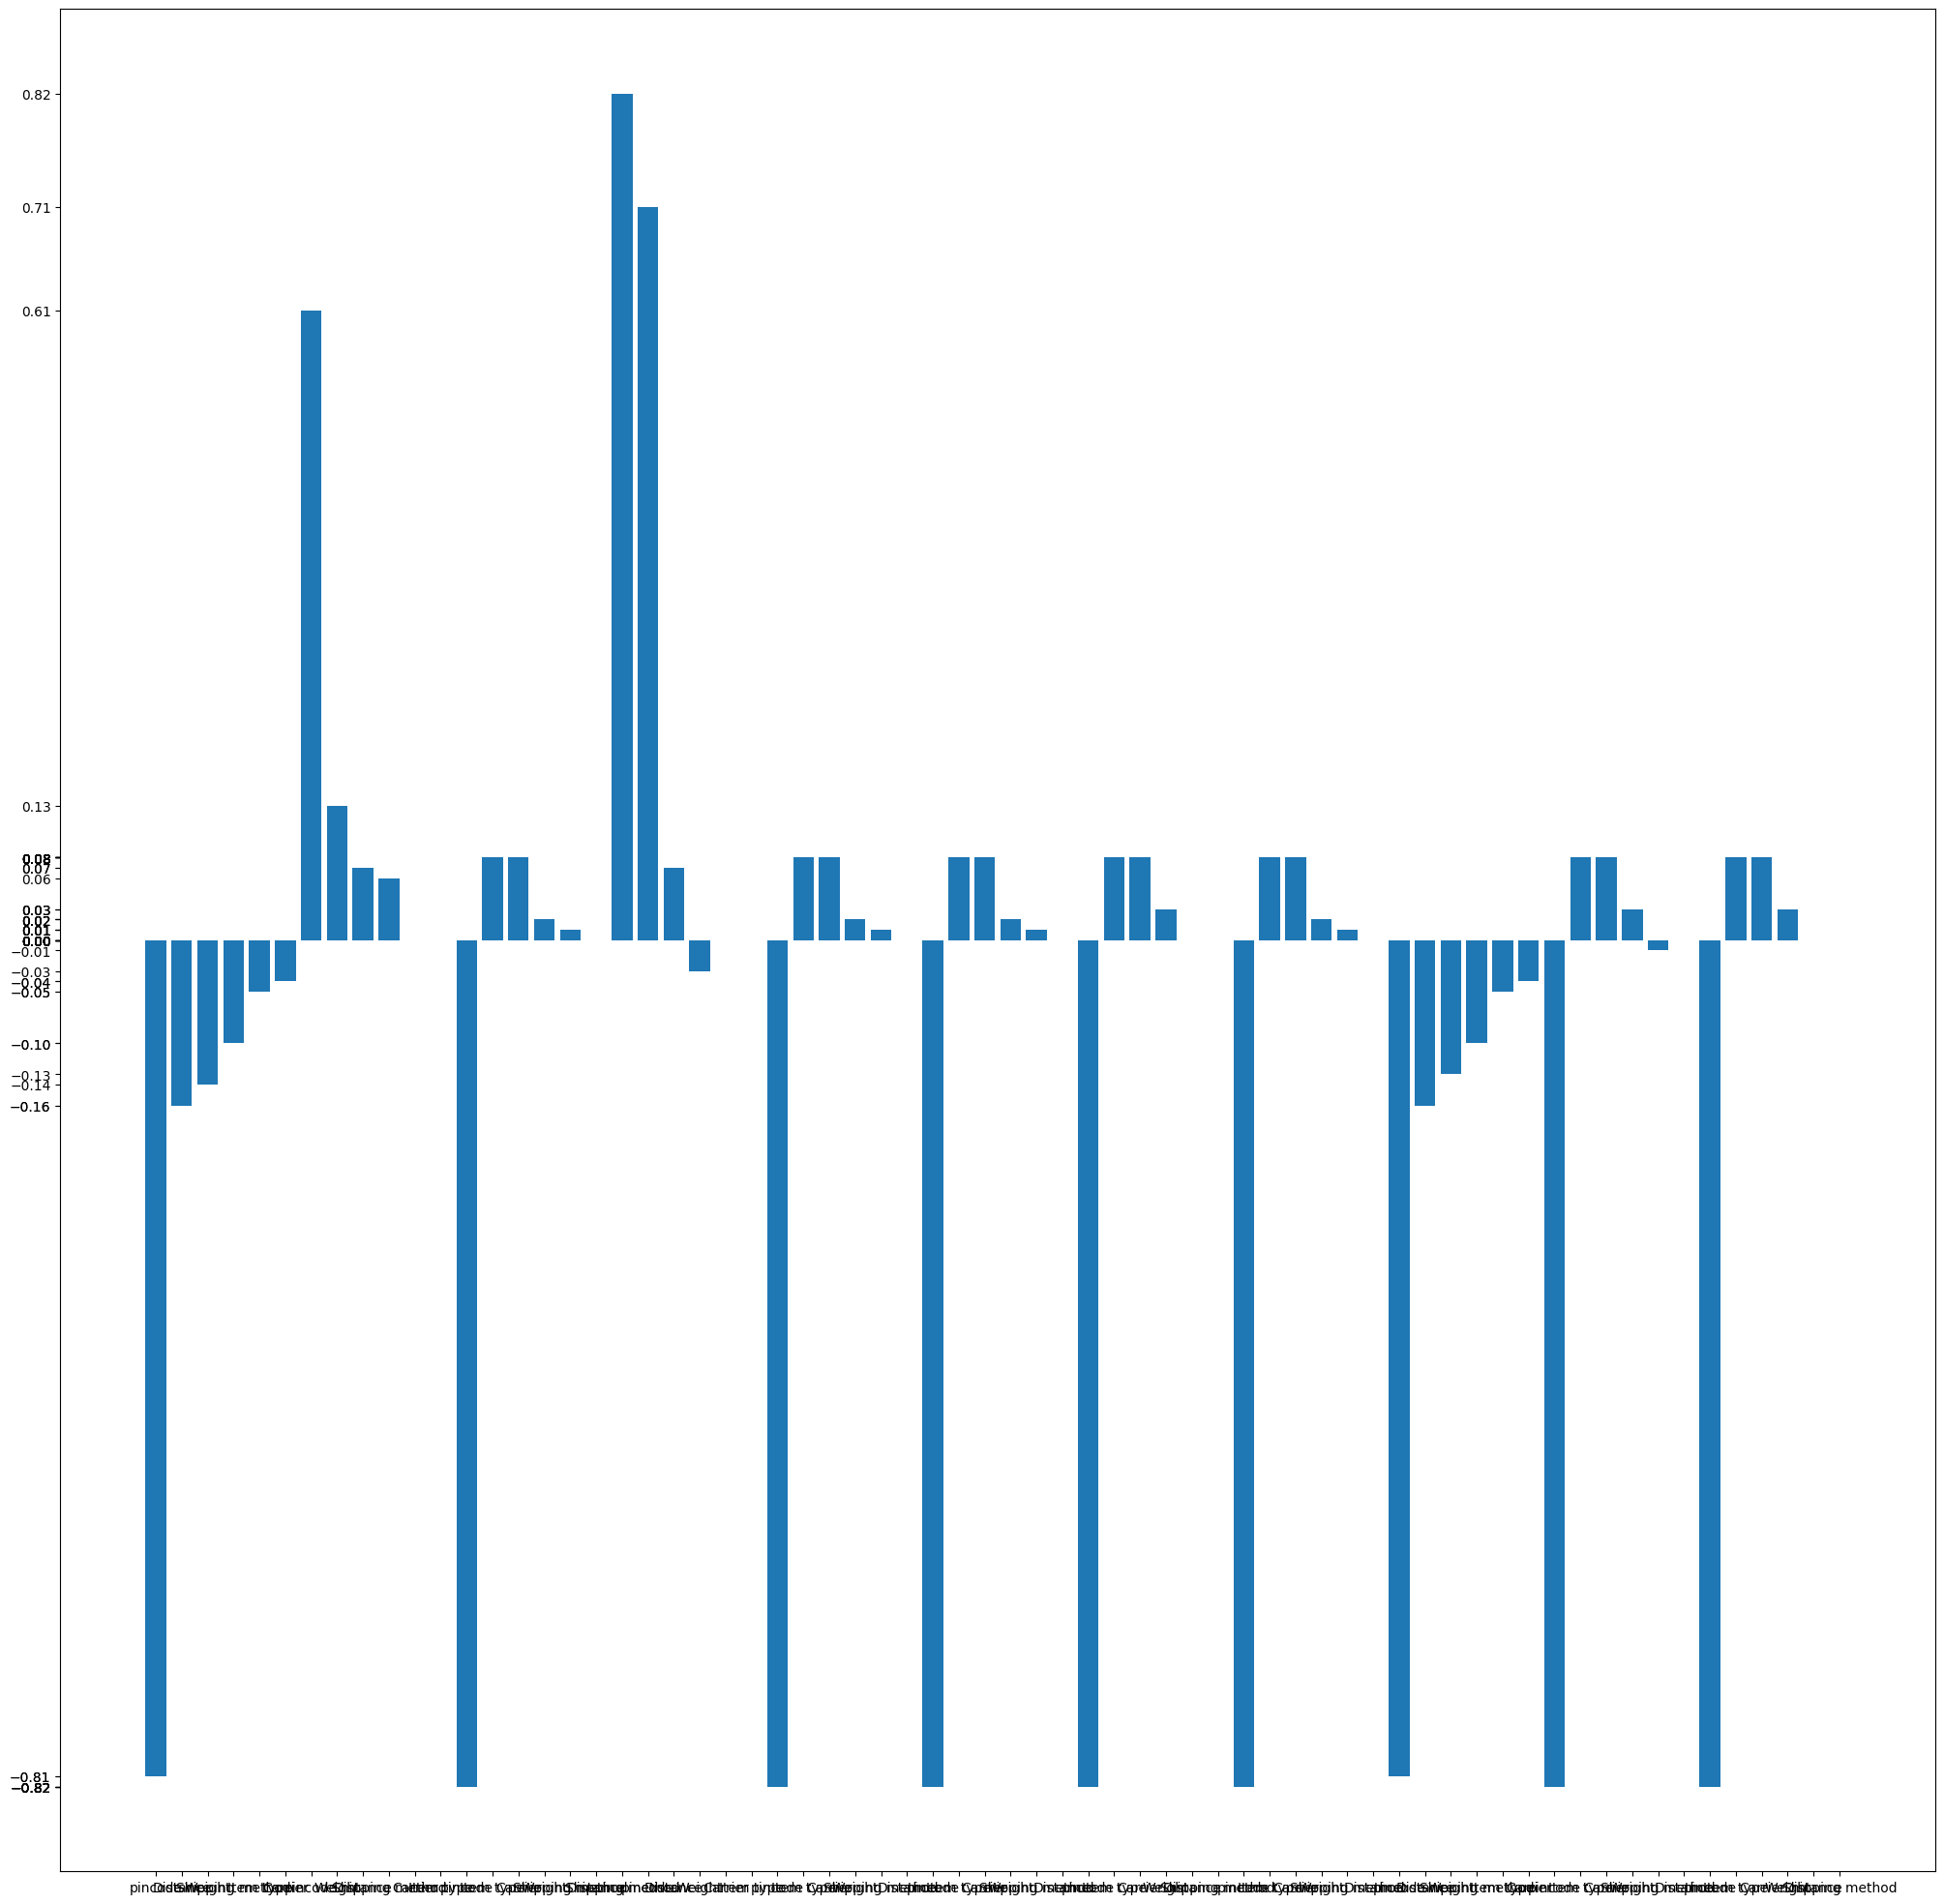

In [506]:
                                                              
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 25, 25

rf_xs = np.arange(len(rf_labels)) 

plt.bar(rf_xs, rf_values, 0.8, align='center')

plt.xticks(rf_xs, rf_labels)
plt.yticks(rf_values)

plt.show()

Feature: 0, Score: 0.04654
Feature: 1, Score: 0.05041
Feature: 2, Score: 0.04569
Feature: 3, Score: 0.00426
Feature: 4, Score: 0.00496
Feature: 5, Score: 0.39113
Feature: 6, Score: 0.00993
Feature: 7, Score: 0.00495
Feature: 8, Score: 0.03897
Feature: 9, Score: 0.39484
Feature: 10, Score: 0.00473
Feature: 11, Score: 0.00092
Feature: 12, Score: 0.00268


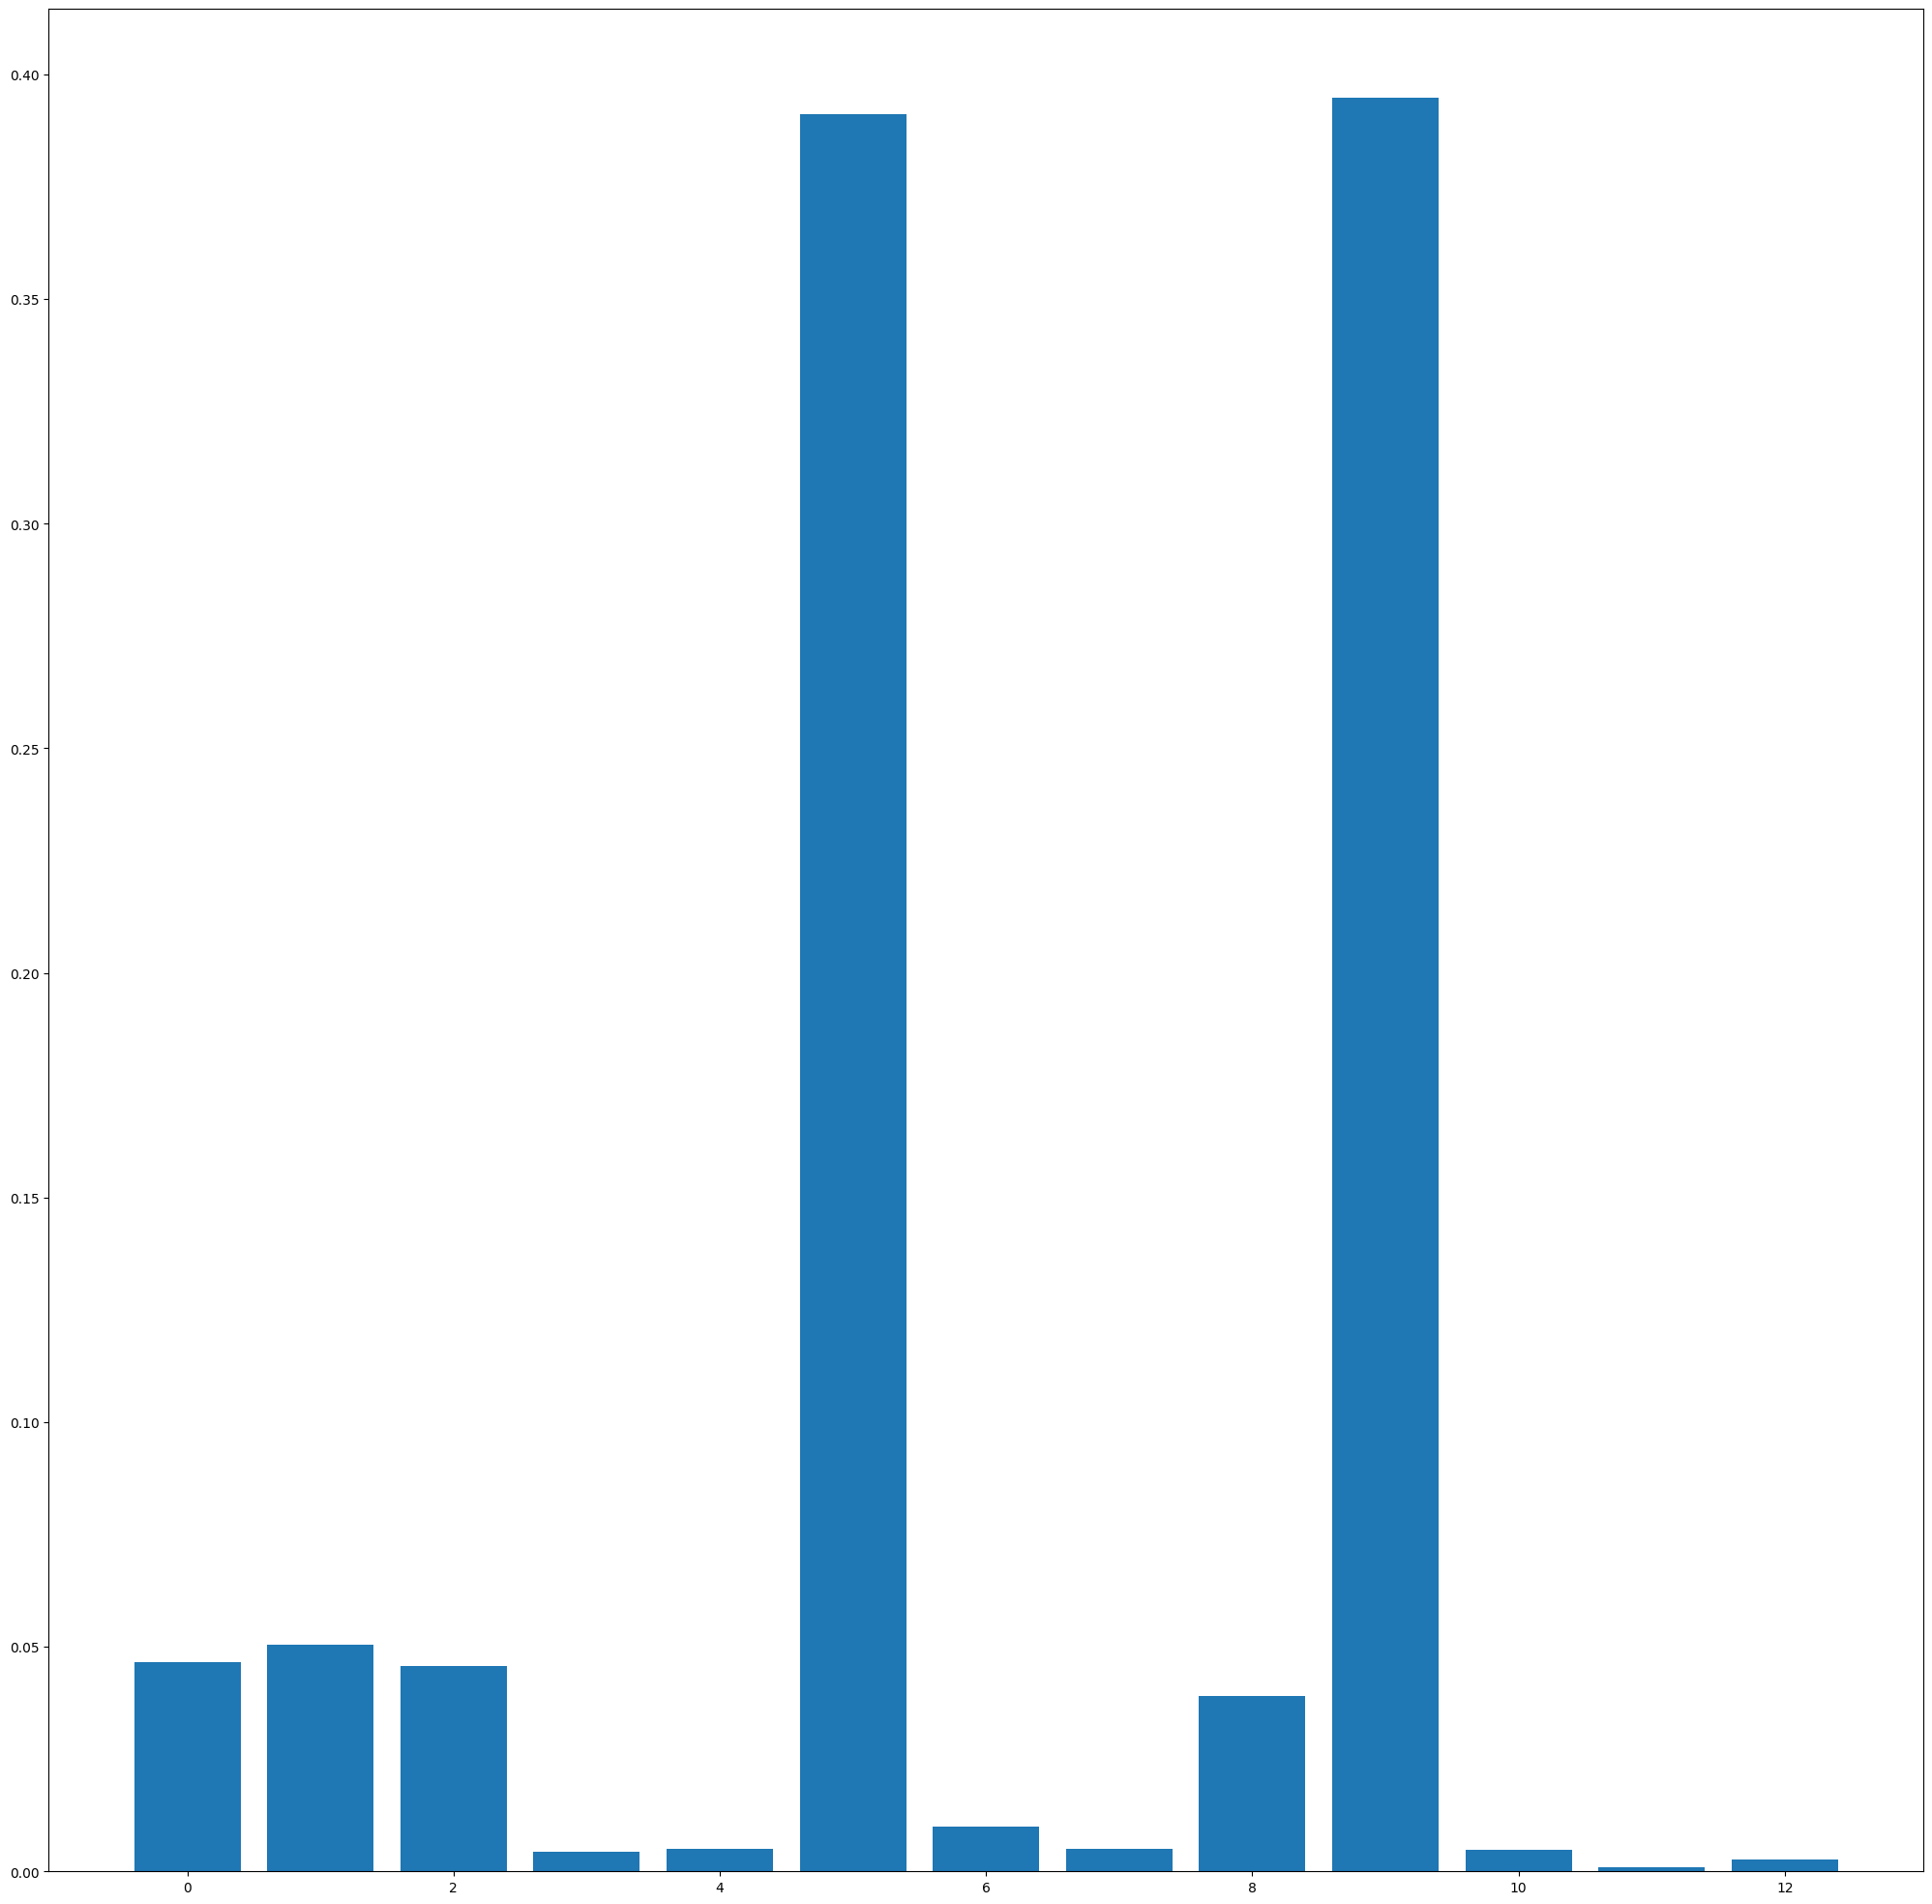

In [507]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [508]:
# Create a DataFrame of the true values and predicted values
df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Calculate the residuals
residuals = df['y_test'] - df['y_pred']

# Create a ColumnDataSource for the plot
source = ColumnDataSource(data=dict(x=df['y_test'], y=residuals))

# Create the residual plot using Bokeh
p = figure(title='Residual Plot', x_axis_label='True Values', y_axis_label='Residuals')
p.circle('x', 'y', source=source, size=10, color='blue')

# Add a horizontal line at y=0 to indicate the zero error line
p.line([df['y_test'].min(), df['y_test'].max()], [0, 0], color='red')

# Show the plot
show(p)

In [509]:
# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

In [510]:
print(mae)
print(mse)
print(rmse)

0.48454545454545456
1.0519363636363641
1.0256394900920909


In [511]:
estimator = model.estimators_[5]
estimator1 = model.estimators_[6]
estimator3 = model.estimators_[4]

In [512]:
num_trees = len(model.estimators_)
print("Number of decision trees in the Random Forest:", num_trees)

Number of decision trees in the Random Forest: 100


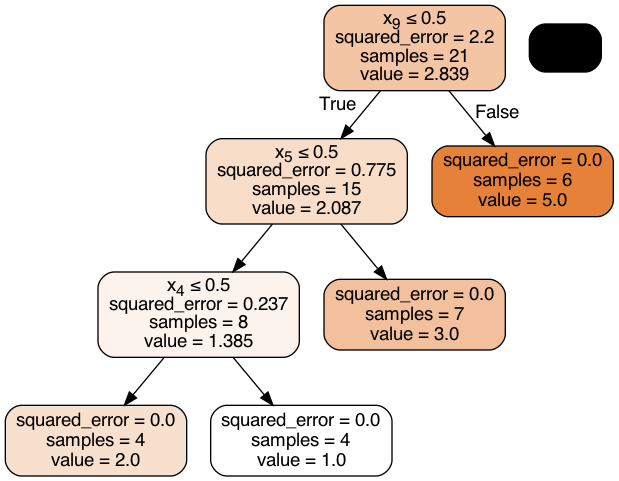

In [483]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data1 = StringIO()
export_graphviz(estimator, out_file=dot_data1,  
               filled=True, rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data1.getvalue())  
Image(graph.create_png())

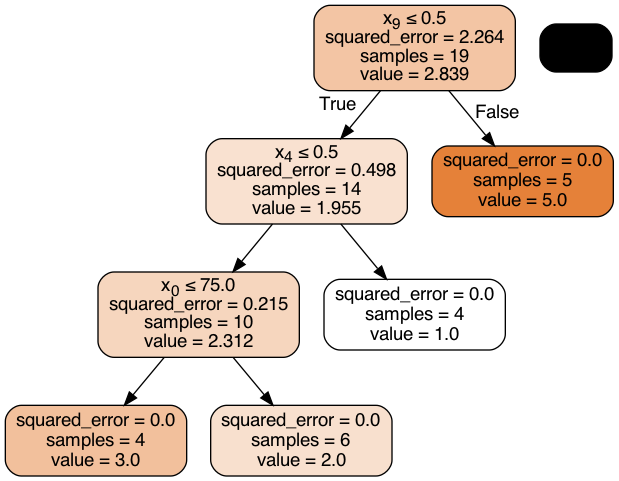

In [438]:


dot_data3 = StringIO()
export_graphviz(estimator1, out_file=dot_data3,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data3.getvalue())  
Image(graph.create_png())

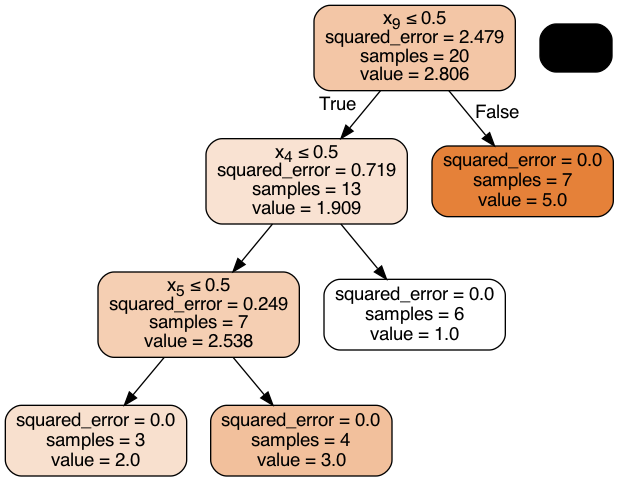

In [484]:
dot_data3 = StringIO()
export_graphviz(estimator3, out_file=dot_data3,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data3.getvalue())  
Image(graph.create_png())

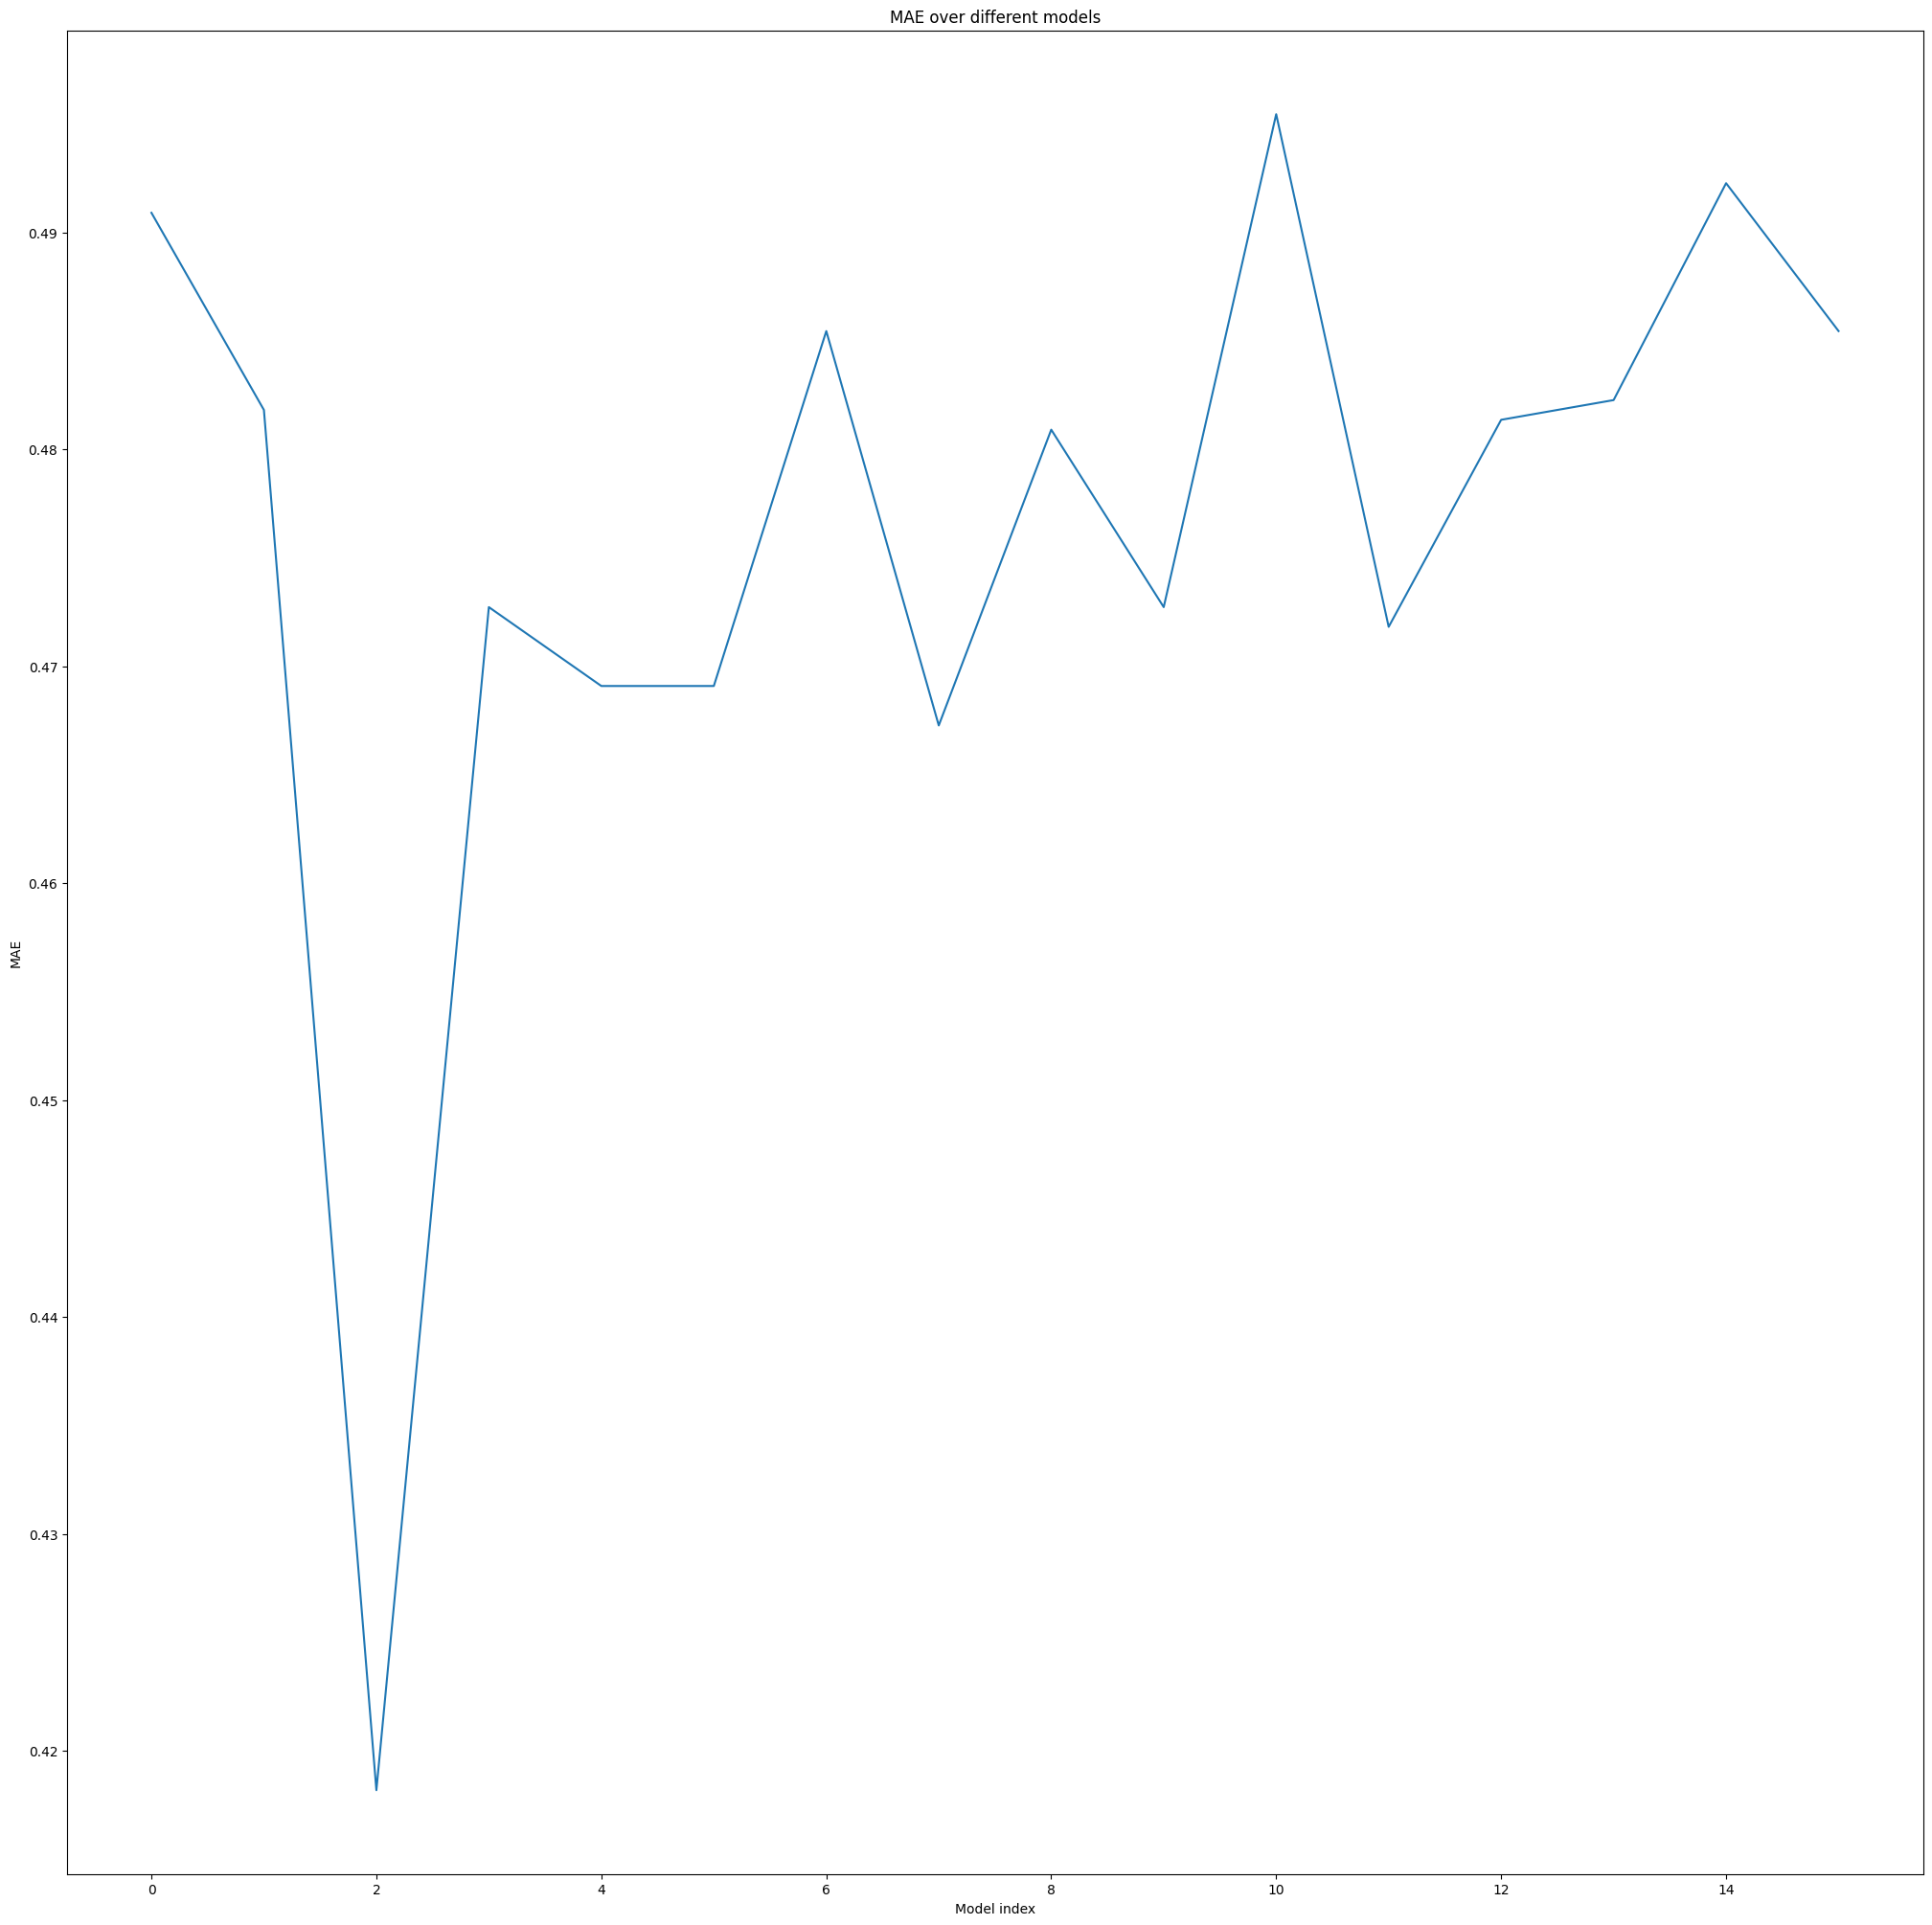

In [513]:
n_estimators = [10, 50, 100, 200]
max_depths = [5, 10, 15, 20]

mae_values = []

# Loop over the different hyperparameters to train and evaluate the models
for n in n_estimators:
    for d in max_depths:
        rf = RandomForestRegressor(n_estimators=n, max_depth=d)
        rf.fit(X_train_encoded.values, y_train)
        y_pred = rf.predict(X_test_encoded.values)
        mae = mean_absolute_error(y_test, y_pred)
        mae_values.append(mae)

# Plot the MAE values over different hyperparameters
fig, ax = plt.subplots()
ax.plot(mae_values)

# Set the labels and title of the plot
ax.set_xlabel('Model index')
ax.set_ylabel('MAE')
ax.set_title('MAE over different models')

# Display the plot
plt.show()

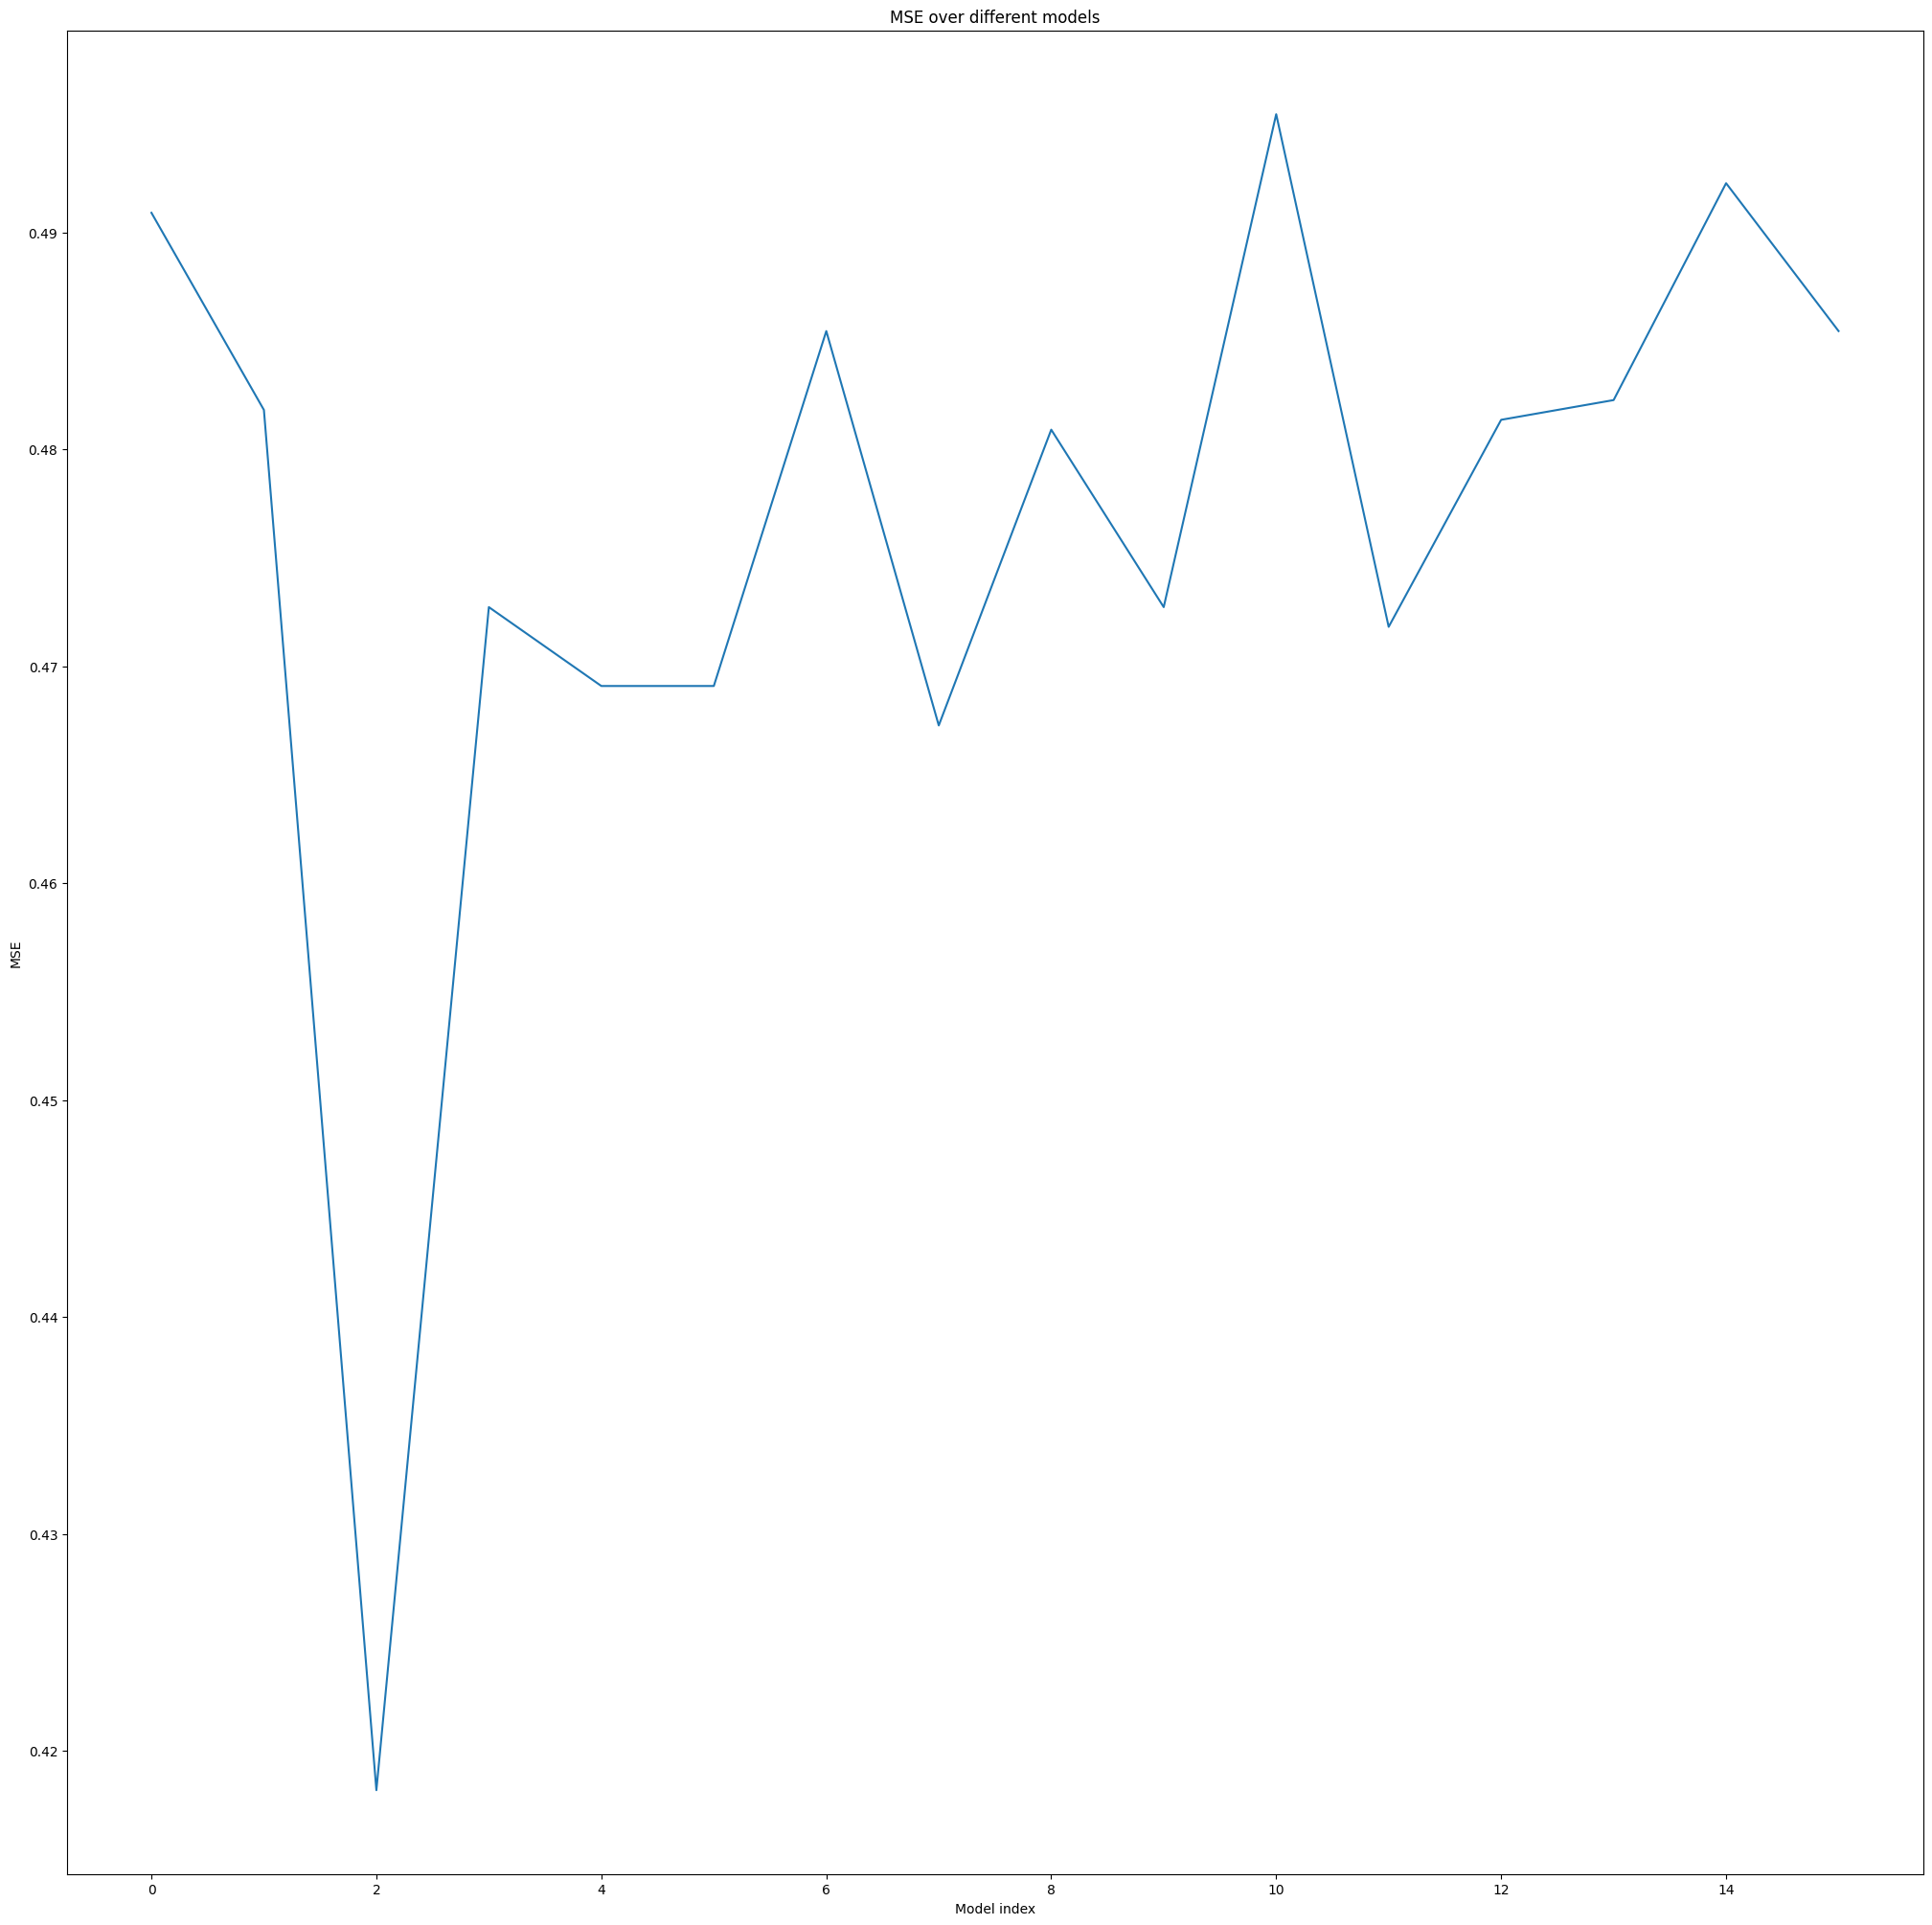

In [514]:


n_estimators = [10, 50, 100, 200]
max_depths = [5, 10, 15, 20]

mse_values = []

# Loop over the different hyperparameters to train and evaluate the models
for n in n_estimators:
    for d in max_depths:
        rf = RandomForestRegressor(n_estimators=n, max_depth=d)
        rf.fit(X_train_encoded.values, y_train)
        y_pred = rf.predict(X_test_encoded.values)
        mse = mean_squared_error(y_test, y_pred)
        mse_values.append(mse)

# Plot the MAE values over different hyperparameters
fig, ax = plt.subplots()
ax.plot(mae_values)

# Set the labels and title of the plot
ax.set_xlabel('Model index')
ax.set_ylabel('MSE')
ax.set_title('MSE over different models')

# Display the plot
plt.show()

Feature 1: pincode - 0.391
Feature 2: Weight - 0.050
Feature 3: Distance - 0.047
Feature 4: Shipping method - 0.046
Feature 5: Item type - 0.005
Feature 6: Carrier - 0.004


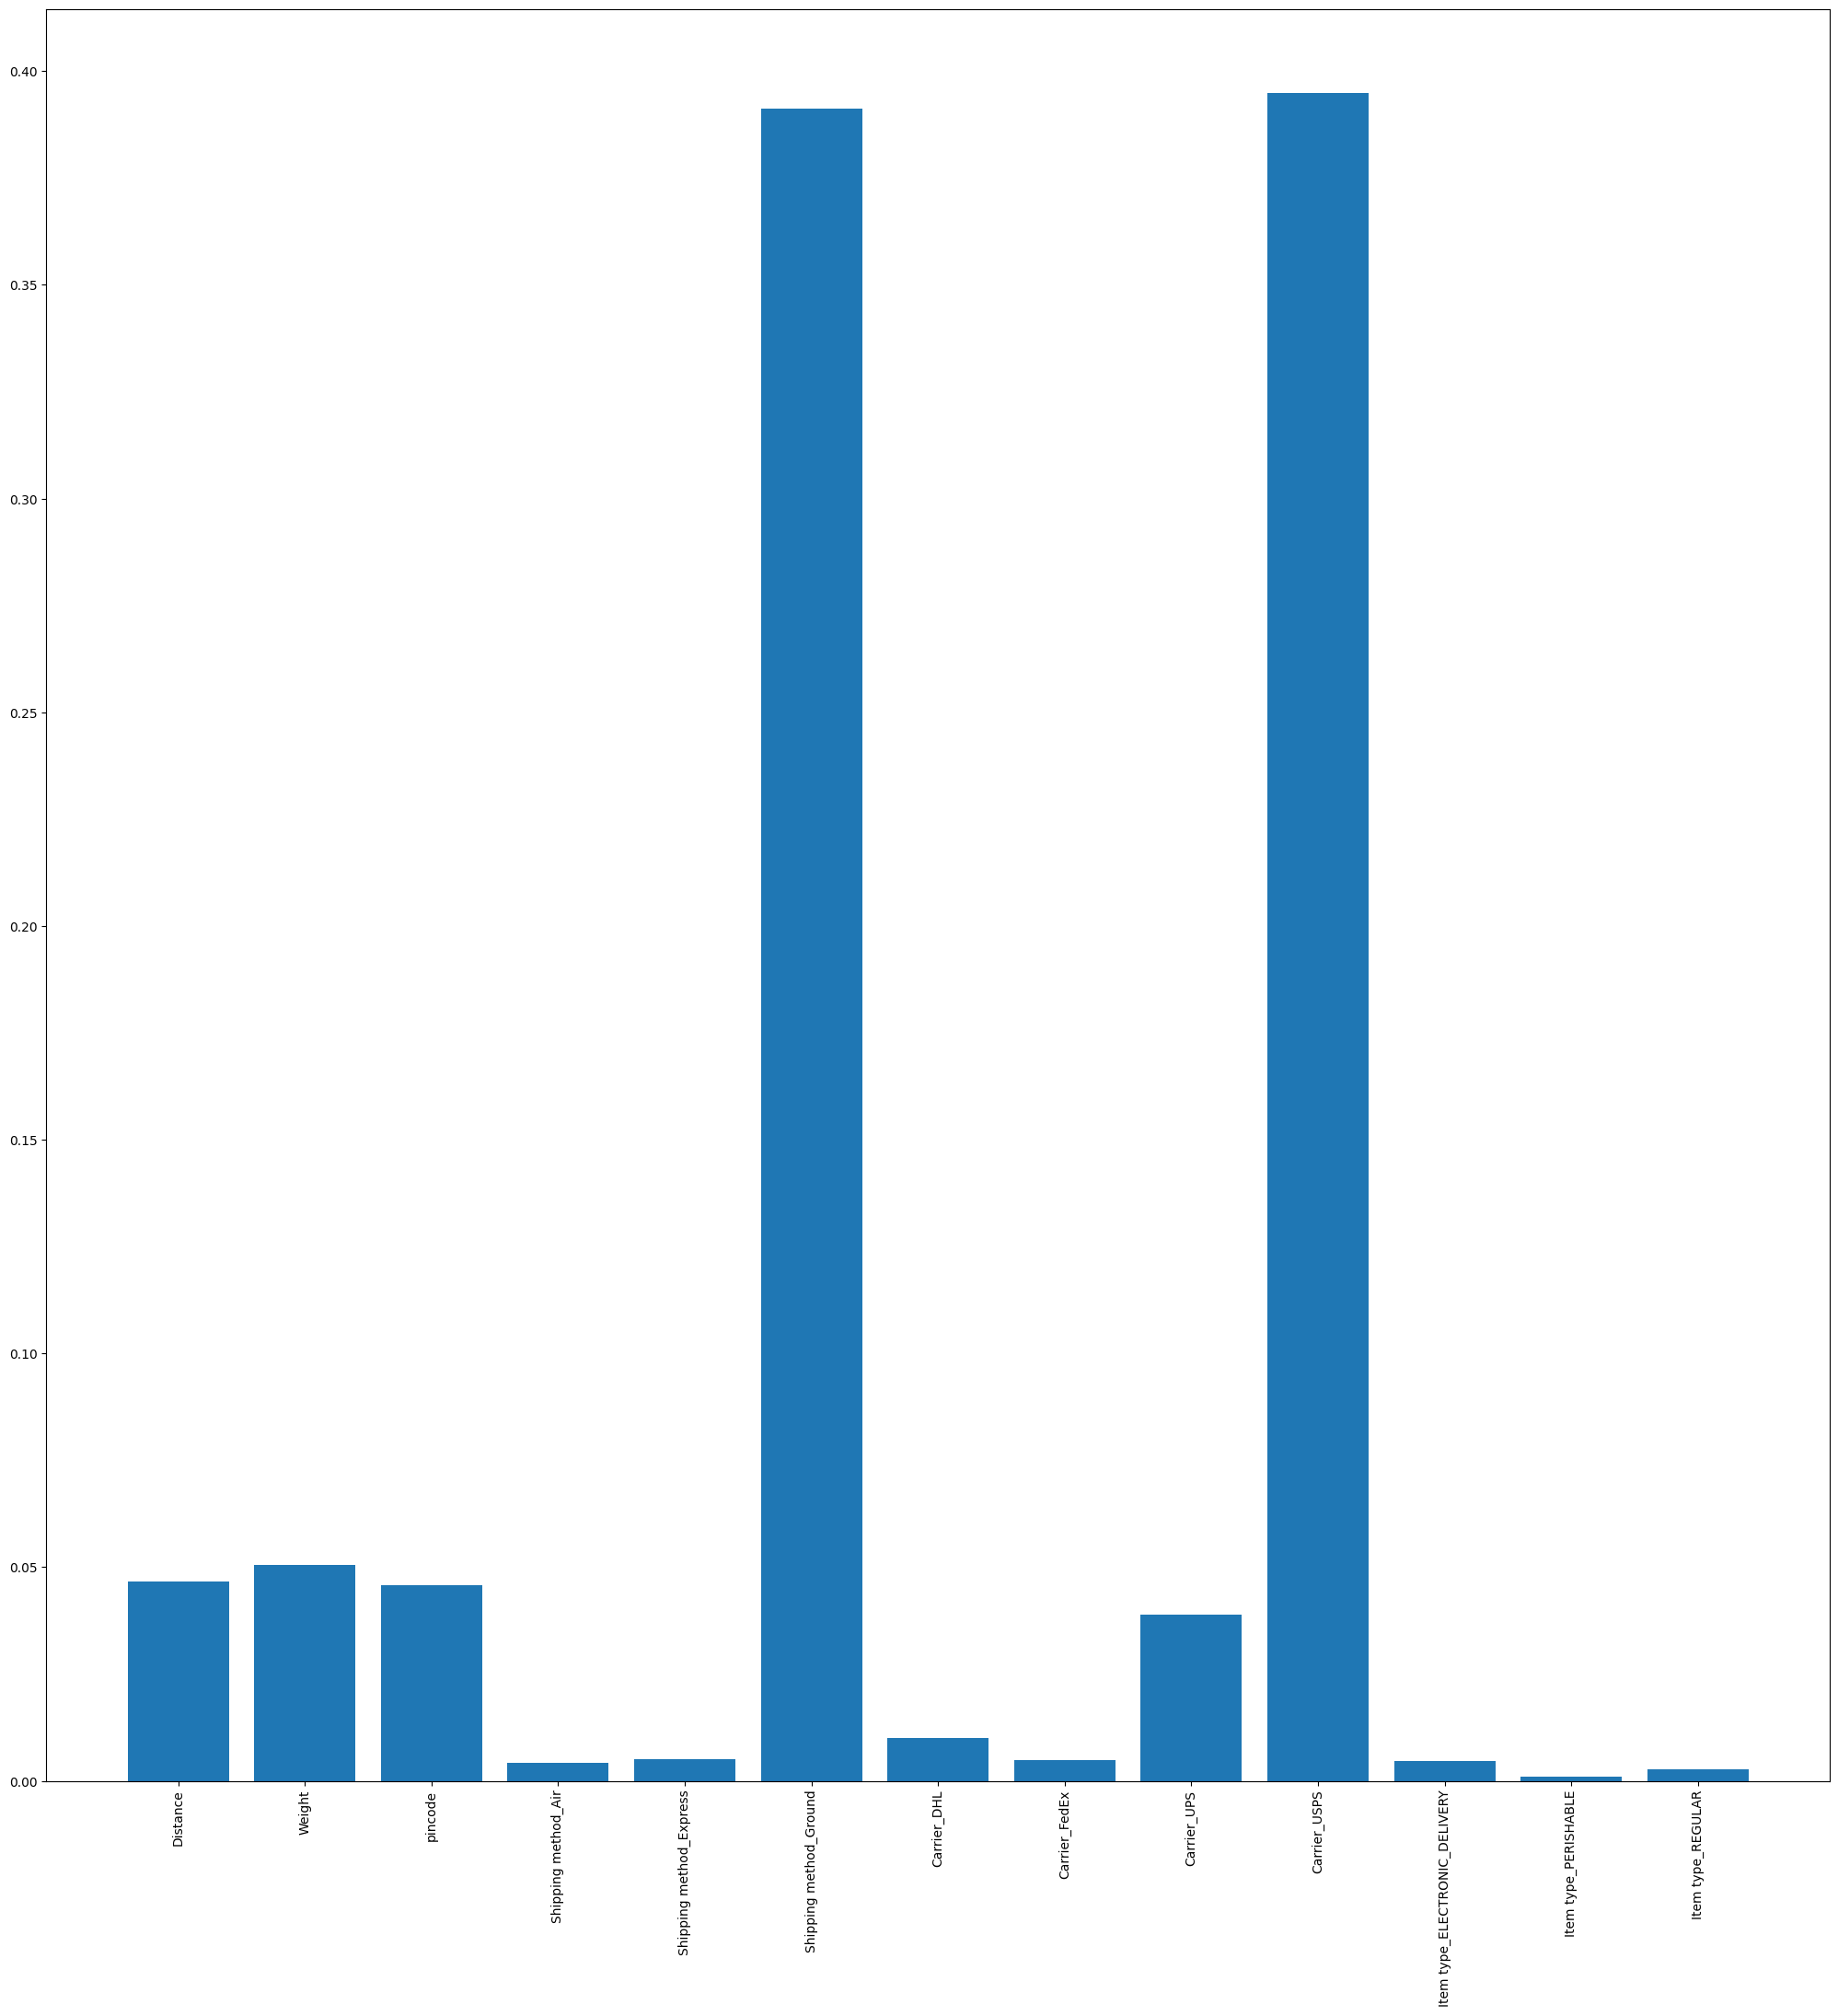

In [515]:
importance = model.feature_importances_

# Sort feature importance in descending order
sorted_importance = sorted(zip(importance, X_test.columns), reverse=True)

# Print the feature importance scores
for i in range(len(sorted_importance)):
    print('Feature {}: {} - {:.3f}'.format(i+1, sorted_importance[i][1], sorted_importance[i][0]))

# Visualize feature importance using a bar chart
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=[x for x in range(len(importance))], labels=X_train_encoded.columns, rotation=90)
plt.show()